In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.metrics import roc_curve, auc
import random
from scipy.optimize import curve_fit
import seaborn as sns
from scipy.stats import *
from scipy import stats
import copy
import re
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import pylab as py 

from Slim_TPCA import Slim_TPCA

In [2]:
# Select four temperature points
# The Data_dir here is the relative directory of the data file to the script
Data_dir = '..\\..\\project_1_data\\pj10_source\\'
col_list = [0, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
TPCA_table1 = pd.read_excel(Data_dir + 'aan0346_Tables_S1_to_S18.xlsx', sheet_name=0, usecols=col_list, header=2)
TPCA_table1.columns = ['Accession','T_37','T_40','T_43','T_46','T_49','T_52','T_55','T_58','T_61','T_64']

col_list = [0, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
TPCA_table7 = pd.read_excel(Data_dir + 'aan0346_Tables_S1_to_S18.xlsx', sheet_name=6, usecols=col_list, header=2)
TPCA_table7.columns = ['Accession','T_37','T_40','T_43','T_46','T_49','T_52','T_55','T_58','T_61','T_64']

col_list = [0, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
TPCA_DMSO = pd.read_excel(Data_dir + 'aan0346_Tables_S1_to_S18.xlsx', sheet_name=14, usecols=col_list, header=2)
TPCA_DMSO.columns = ['Accession','T_37','T_40','T_43','T_46','T_49','T_52','T_55','T_58','T_61','T_64']

col_list = [0, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
TPCA_MTX = pd.read_excel(Data_dir + 'aan0346_Tables_S1_to_S18.xlsx', sheet_name=14, usecols=col_list, header=2)
TPCA_MTX.columns = ['Accession','T_37','T_40','T_43','T_46','T_49','T_52','T_55','T_58','T_61','T_64']
# Filter out some proteins with abnormal changes in thermal stability
TPCA_table1 = TPCA_table1[np.sum(TPCA_table1.iloc[:,1:]>1.2, axis=1)==0].reset_index(drop=True)
TPCA_table7 = TPCA_table7[np.sum(TPCA_table7.iloc[:,1:]>1.2, axis=1)==0].reset_index(drop=True)
TPCA_DMSO = TPCA_DMSO[np.sum(TPCA_DMSO.iloc[:,1:]>1.2, axis=1)==0].reset_index(drop=True)
TPCA_MTX = TPCA_MTX[np.sum(TPCA_MTX.iloc[:,1:]>1.2, axis=1)==0].reset_index(drop=True)

TPCA_table1_4t = TPCA_table1.iloc[:,[0,1,4,7,9]]
TPCA_table7_4t = TPCA_table7.iloc[:,[0,1,4,7,9]]
TPCA_DMSO_4t = TPCA_DMSO.iloc[:,[0,1,4,7,9]]
TPCA_MTX_4t = TPCA_MTX.iloc[:,[0,1,4,7,9]]

In [8]:
TPCA_table1_4t

,Accession,T_37,T_46,T_55,T_61
0,P06733,0.996324,1.016098,0.938197,0.737465
1,P08238,0.996324,0.925673,0.192489,0.083953
2,P60709,0.996324,0.859558,0.184996,0.096016
3,P07900,0.996324,0.935755,0.177301,0.065293
4,P63261,0.996324,0.862699,0.185592,0.092703
...,...,...,...,...,...
7344,Q9Y219,0.996324,0.996797,0.495677,0.350349
7345,Q9Y4I5,0.996324,0.938674,0.540570,0.407048
7346,Q9Y587,0.996324,0.790674,0.361195,0.196616
7347,Q9Y5B6,0.996324,0.775120,0.406555,0.272317


In [9]:
TPCA_table7_4t

,Accession,T_37,T_46,T_55,T_61
0,A0AV96,0.999317,0.767114,0.236343,0.271086
1,A0AVF1,0.999317,0.630179,0.170644,0.081662
2,A0AVI2,0.999317,0.975093,0.751207,0.435817
3,A0AVT1,0.999317,0.932444,0.117044,0.060957
4,A0FGR8,0.999317,0.776876,0.292422,0.144480
...,...,...,...,...,...
7504,R4GMX3,0.999317,0.823301,0.154396,0.065230
7505,R4GMY8,0.999317,1.102146,0.233735,0.049690
7506,R4GN35,0.999317,0.852296,0.209799,0.099568
7507,R4GNH3,0.999317,1.064515,0.388299,0.099491


In [10]:
TPCA_DMSO_4t

,Accession,T_37,T_46,T_55,T_61
0,A0AVT1,0.993418,0.840974,0.179851,0.082742
1,A0FGR8,0.993418,0.738062,0.272239,0.146445
2,A0JNW5,0.993418,0.834989,0.241493,0.080578
3,A0MZ66,0.993418,0.703659,0.181131,0.102229
4,A1A5D9,0.993418,1.124804,1.010595,0.859623
...,...,...,...,...,...
5691,Q9Y6Y0,0.993418,0.636364,0.160605,0.085604
5692,Q9Y6Y8,0.993418,0.759312,0.227500,0.134417
5693,R4GMX3,0.993418,0.637131,0.143294,0.060596
5694,R4GNH3,0.993418,0.911211,0.384059,0.060962


In [11]:
TPCA_MTX_4t

,Accession,T_37,T_46,T_55,T_61
0,A0AVT1,0.996284,0.870993,0.162564,0.075434
1,A0FGR8,0.996284,0.856500,0.385548,0.172577
2,A0JNW5,0.996284,0.992454,0.347952,0.115628
3,A0MZ66,0.996284,0.797549,0.225280,0.118198
4,A1A5D9,0.996284,0.904087,0.604036,0.418830
...,...,...,...,...,...
5654,Q9Y6Y0,0.996284,0.771987,0.194220,0.104885
5655,Q9Y6Y8,0.996284,0.878918,0.267283,0.166219
5656,R4GMX3,0.996284,0.780070,0.189431,0.079288
5657,R4GNH3,0.996284,0.925082,0.447936,0.114163


In [12]:
# Obtain a table with credible protein pair information reported in at least two papers
pair_table0 = pd.read_excel(Data_dir + 'TPCA_table2.xlsx')
pair_table1 = pair_table0[pair_table0['No. of Publications']>2].reset_index(drop=True)
pair_table1

,Protein A,Protein B,No. of Publications
0,P40337,Q16665,79
1,O14920,Q9Y6K9,66
2,P22681,P62993,64
3,P42345,Q8N122,60
4,P05412,P45983,58
...,...,...,...
5485,Q12769,Q9BW27,3
5486,O43143,P52756,3
5487,Q16576,Q8WXI9,3
5488,O15151,P27348,3


In [13]:
# Get information about protein complexes in the corum database
col_list = [0, 1, 2, 5, 9, 12]
corum = pd.read_csv(Data_dir + 'allComplexes.txt', sep='\t', usecols=col_list)
corum

,ComplexID,ComplexName,Organism,subunits(UniProt IDs),GO description,subunits(Gene name)
0,1,BCL6-HDAC4 complex,Human,P41182;P56524,DNA topological change;negative regulation of ...,BCL6;HDAC4
1,2,BCL6-HDAC5 complex,Human,P41182;Q9UQL6,DNA topological change;negative regulation of ...,BCL6;HDAC5
2,3,BCL6-HDAC7 complex,Human,P41182;Q8WUI4,DNA topological change;negative regulation of ...,BCL6;HDAC7
3,4,Multisubunit ACTR coactivator complex,Human,Q09472;Q92793;Q92831;Q9Y6Q9,"positive regulation of transcription, DNA-temp...",EP300;CREBBP;KAT2B;NCOA3
4,9,6S-nuclear aryl hydrocarbon (Ah) receptor liga...,Mouse,P30561;P53762,regulation of RNA biosynthetic process;regulat...,Ahr;Arnt
...,...,...,...,...,...,...
4269,7588,APP(AICD)-FOXO1 complex,Human,P05067;Q12778,cell death;cytoplasm;apoptotic process,APP;FOXO1
4270,7589,APP(AICD)-FOXO4 complex,Human,P05067;P98177,cell death;cytoplasm;apoptotic process,APP;FOXO4
4271,7592,Meiob-Rpa2-Spata22 complex,Mouse,Q5SV06;Q62193;Q9D513,chromatin DNA binding,Spata22;Rpa2;Meiob
4272,7593,AKAP13-MAP2K3-MAP3K20-MAPK14-PKN1 complex,Human,P46734;Q12802;Q16512;Q16539;Q9NYL2,MAPK cascade,MAP2K3;AKAP13;PKN1;MAPK14;MAP3K20


<AxesSubplot:>

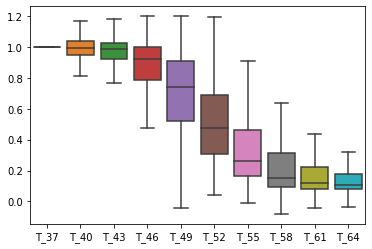

In [5]:
# Using boxplot to show the trend of data
sns.boxplot(data = TPCA_table7, showfliers=False)

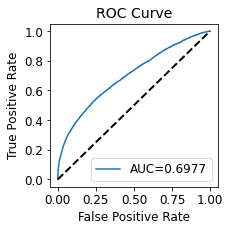

In [6]:
# Using ROC curve to evaluate the prediction
Slim_TPCA.roc_plot(TPCA_table7, pair_table1)

In [7]:
# Calculate TPCA signatures of complexes by sampling
table7_random_sample_4t, table7_sig_sample_4t = Slim_TPCA.complex_signature_sample(TPCA_table7_4t, corum)

In [14]:
table7_random_sample_4t

,3,4,5,6,7,8,9,10,11,12,...,29,31,32,35,43,57,65,69,82,121
0,0.779244,0.649008,0.564714,0.518125,0.610693,0.594234,0.557421,0.555023,0.529464,0.505033,...,0.615243,0.599833,0.593519,0.584435,0.561588,0.549724,0.534998,0.566381,0.549865,0.556998
1,0.343141,0.648300,0.622926,0.545459,0.593774,0.639406,0.682846,0.639320,0.678559,0.675339,...,0.484884,0.472681,0.474262,0.558945,0.514685,0.575610,0.577161,0.541165,0.592101,0.563332
2,0.773273,0.382246,0.622980,0.745530,0.727845,0.674314,0.582740,0.652440,0.572770,0.567719,...,0.526473,0.566758,0.602624,0.603471,0.576615,0.573653,0.566111,0.561316,0.582207,0.566660
3,0.349296,0.616668,0.732306,0.684266,0.526539,0.603072,0.555510,0.486570,0.505072,0.456243,...,0.625528,0.595571,0.546429,0.508919,0.586783,0.539033,0.584882,0.562064,0.481345,0.592664
4,0.734995,0.785656,0.602765,0.687350,0.602336,0.528106,0.447551,0.236086,0.416708,0.513488,...,0.551322,0.648130,0.658150,0.606709,0.523009,0.552707,0.488379,0.567467,0.656345,0.538608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.385319,0.779954,0.597345,0.537456,0.772089,0.476241,0.429126,0.612893,0.588293,0.612771,...,0.597774,0.675950,0.529701,0.602357,0.573796,0.560113,0.580977,0.601052,0.541679,0.544367
9996,0.681380,0.797056,0.578530,0.630504,0.387264,0.326173,0.710226,0.447887,0.556621,0.650238,...,0.568941,0.484094,0.622397,0.511496,0.552091,0.575063,0.595143,0.533166,0.585816,0.524210
9997,0.532761,0.514534,0.839380,0.478747,0.558719,0.612183,0.714550,0.470922,0.301195,0.367962,...,0.643930,0.626394,0.474924,0.638773,0.479897,0.583882,0.577249,0.581806,0.521220,0.518727
9998,0.666261,0.736488,0.844754,0.320485,0.384130,0.850851,0.520765,0.534594,0.421263,0.500090,...,0.502745,0.624295,0.653327,0.617367,0.597130,0.602753,0.518709,0.560822,0.623126,0.516156


In [15]:
table7_sig_sample_4t

,ComplexID,ComplexName,Organism,subunits(UniProt IDs),GO description,subunits(Gene name),Subunit_Found,No_Subunit_Found,Avg_Dist,Avg_Dist_Derived,TPCA_Sig_P-value,TPCA_Sig_Z-score
0,4,Multisubunit ACTR coactivator complex,Human,Q09472;Q92793;Q92831;Q9Y6Q9,"positive regulation of transcription, DNA-temp...",EP300;CREBBP;KAT2B;NCOA3,Q09472;Q92793;Q9Y6Q9,3,0.171014,0.853961,0.0316,1.835605
1,10,Condensin I complex,Human,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,M phase;mitotic nuclear division;chromosome co...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,5,0.047746,0.954429,0.0000,3.996365
2,12,BLOC-2 (biogenesis of lysosome-related organel...,Human,Q86YV9;Q969F9;Q9UPZ3,endosome organization;lysosome organization;va...,HPS6;HPS3;HPS5,Q86YV9;Q969F9;Q9UPZ3,3,0.113091,0.898399,0.0071,2.258323
3,15,NCOR complex,Human,O15379;O60907;O75376;Q13227;Q92828;Q9BZK7,DNA topological change;negative regulation of ...,HDAC3;TBL1X;NCOR1;GPS2;CORO2A;TBL1XR1,O15379;O60907;O75376;Q92828;Q9BZK7,5,0.216056,0.822330,0.0125,2.258320
4,23,BLOC-1 (biogenesis of lysosome-related organel...,Human,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q96EV8;Q9NU...,None,SNAPIN;BLOC1S1;BLOC1S3;BLOC1S2;BLOC1S5;DTNBP1;...,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q96EV8;Q9NUP1,7,0.176741,0.849804,0.0008,3.176014
...,...,...,...,...,...,...,...,...,...,...,...,...
1087,7582,ESR2-TRAP/Mediator coactivator complex,Human,O43513;O60244;O75448;O75586;P24863;P49336;Q094...,mediator complex;mRNA transcription;nucleus;re...,MED7;MED14;MED24;MED6;CCNC;CDK8;EP300;MED21;ME...,O43513;O60244;P24863;P49336;Q09472;Q13503;Q156...,14,0.211030,0.825743,0.0000,4.241964
1088,7583,"CDK8 subcomplex (CCNC, CDK8, MED12, MED13)",Human,P24863;P49336;Q93074;Q9UHV7,histone kinase activity,CCNC;CDK8;MED12;MED13,P24863;P49336;Q93074;Q9UHV7,4,0.222320,0.818116,0.0312,1.866946
1089,7584,"CDK8 subcomplex (CCNC, CDK8, MED12)",Human,P24863;P49336;Q93074,histone kinase activity,CCNC;CDK8;MED12,P24863;P49336;Q93074,3,0.249921,0.800051,0.1006,1.322658
1090,7585,"CDK8 subcomplex (CCNC, CDK8, MED13)",Human,P24863;P49336;Q9UHV7,histone kinase activity,CCNC;CDK8;MED13,P24863;P49336;Q9UHV7,3,0.139880,0.877285,0.0156,2.057495


In [16]:
# Calculate TPCA signatures of complexes by Beta distribution fitting
table7_random_beta_4t, table7_sig_beta_4t = Slim_TPCA.complex_signature_beta(TPCA_table7_4t, corum)
sig_result = pd.DataFrame({'Sample':table7_sig_sample_4t['TPCA_Sig_P-value'], 'Beta':table7_sig_beta_4t['TPCA_Sig_P-value']})
sig_result = sig_result[np.sum(sig_result==0, axis=1)==0].reset_index(drop=True)

In [17]:
sig_result

,Sample,Beta
0,0.0316,0.009652
1,0.0545,0.026748
2,0.2684,0.250098
3,0.1623,0.156690
4,0.0251,0.004361
...,...,...
824,0.3747,0.363433
825,0.1730,0.162725
826,0.5883,0.571875
827,0.0312,0.011850


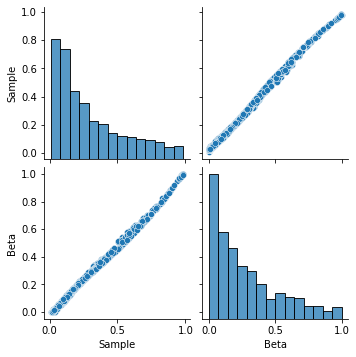

In [18]:
sns.pairplot(data=sig_result)

In [19]:
# Calculate TPCA dynamic modulation signatures of complexes by sampling and absolute distance
MTX_dynamic_absolute_random_4t, MTX_dynamic_absolute_sample_4t = Slim_TPCA.dynamic_complex_absolute_sample(TPCA_DMSO_4t, TPCA_MTX_4t, corum)

In [20]:
MTX_dynamic_absolute_random_4t

,3,4,5,6,7,8,9,10,11,12,...,28,31,34,38,42,66,67,68,85,126
0,0.019390,0.017768,-0.005482,0.014657,0.004218,0.005317,0.020310,0.027237,0.063059,0.027803,...,-0.012784,-0.013336,-0.008926,-0.014170,-0.015879,0.005040,0.006060,0.007865,-0.023312,-0.043110
1,0.034352,-0.016493,0.055331,0.057159,0.031395,0.025806,-0.005620,0.005728,-0.016734,-0.020292,...,-0.010159,0.015728,0.028059,-0.014992,-0.029510,-0.093621,-0.095533,-0.087212,-0.057435,-0.009502
2,0.048409,0.096671,0.051531,0.034073,0.084055,-0.056832,-0.039717,-0.057635,-0.102303,-0.037304,...,-0.052334,-0.128422,-0.131161,-0.079601,-0.070588,0.002906,0.005883,0.000034,0.005669,-0.057841
3,0.039388,0.061160,0.038627,-0.083045,-0.150321,-0.042767,-0.029652,-0.056840,-0.018775,-0.042738,...,-0.083454,-0.035295,-0.037749,-0.061469,-0.049153,-0.018021,-0.042806,-0.040088,-0.071188,-0.012680
4,0.040657,0.041840,-0.124119,-0.032774,-0.010920,-0.067074,-0.002381,-0.012825,0.042552,0.102479,...,-0.038015,-0.072640,-0.050444,0.046777,0.034189,-0.087155,-0.062412,-0.068550,-0.027857,-0.026515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.448212,-0.030953,-0.531915,0.023555,0.002192,-0.070471,-0.085362,0.080573,0.016617,0.063970,...,-0.020822,0.028467,-0.030114,-0.009254,0.015827,-0.039435,-0.007448,-0.014886,-0.015587,-0.007732
9996,0.034874,0.027597,0.116606,0.022516,-0.025259,0.037002,-0.120146,-0.106739,-0.141229,0.076553,...,-0.035181,0.013102,-0.026978,-0.045025,-0.033807,-0.000484,-0.032710,-0.025255,0.003104,-0.017043
9997,0.064068,-0.089895,0.019111,-0.009754,-0.088511,0.067880,0.015009,-0.132397,-0.099199,-0.129614,...,0.003447,-0.018253,-0.011799,-0.043683,0.034941,-0.043117,-0.002664,-0.010679,-0.057793,-0.022571
9998,-0.078887,-0.018101,0.033638,-0.030903,-0.040812,-0.116837,-0.000939,-0.143596,-0.028123,0.000261,...,0.003203,-0.018020,-0.005822,-0.072891,-0.048994,-0.029375,-0.011082,-0.024573,-0.010859,-0.021181


In [21]:
MTX_dynamic_absolute_sample_4t

,ComplexID,ComplexName,Organism,subunits(UniProt IDs),GO description,subunits(Gene name),Subunit_Found,No_Subunit_Found,Avg_Dist_1,Avg_Dist_Derived_1,Avg_Dist_2,Avg_Dist_Derived_2,Avg_Dist_change,Dynamic_P
0,4,Multisubunit ACTR coactivator complex,Human,Q09472;Q92793;Q92831;Q9Y6Q9,"positive regulation of transcription, DNA-temp...",EP300;CREBBP;KAT2B;NCOA3,Q09472;Q92793;Q9Y6Q9,3,0.155208,0.865645,0.309147,0.763856,-0.153939,0.8295
1,10,Condensin I complex,Human,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,M phase;mitotic nuclear division;chromosome co...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,5,0.069342,0.935154,0.082957,0.923397,-0.013615,0.4574
2,15,NCOR complex,Human,O15379;O60907;O75376;Q13227;Q92828;Q9BZK7,DNA topological change;negative regulation of ...,HDAC3;TBL1X;NCOR1;GPS2;CORO2A;TBL1XR1,O15379;O60907;O75376;Q92828;Q9BZK7,5,0.199575,0.833629,0.208486,0.827482,-0.008911,0.4375
3,23,BLOC-1 (biogenesis of lysosome-related organel...,Human,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q96EV8;Q9NU...,None,SNAPIN;BLOC1S1;BLOC1S3;BLOC1S2;BLOC1S5;DTNBP1;...,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q9NUP1,6,0.161005,0.861323,0.207986,0.827824,-0.046981,0.6077
4,27,Arp2/3 protein complex,Human,O15143;O15144;O15145;O15511;P59998;P61158;P61160,None,ARPC1B;ARPC2;ARPC3;ARPC5;ARPC4;ACTR3;ACTR2,O15143;O15144;O15145;O15511;P61158;P61160,6,0.104131,0.905690,0.137539,0.879091,-0.033409,0.5433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,7582,ESR2-TRAP/Mediator coactivator complex,Human,O43513;O60244;O75448;O75586;P24863;P49336;Q094...,mediator complex;mRNA transcription;nucleus;re...,MED7;MED14;MED24;MED6;CCNC;CDK8;EP300;MED21;ME...,O43513;O60244;P24863;P49336;Q09472;Q13503;Q156...,14,0.336775,0.748069,0.236984,0.808418,0.099791,0.0196
969,7583,"CDK8 subcomplex (CCNC, CDK8, MED12, MED13)",Human,P24863;P49336;Q93074;Q9UHV7,histone kinase activity,CCNC;CDK8;MED12;MED13,P24863;P49336;Q93074;Q9UHV7,4,0.331881,0.750818,0.230481,0.812690,0.101400,0.1235
970,7584,"CDK8 subcomplex (CCNC, CDK8, MED12)",Human,P24863;P49336;Q93074,histone kinase activity,CCNC;CDK8;MED12,P24863;P49336;Q93074,3,0.390432,0.719201,0.204315,0.830348,0.186117,0.0642
971,7585,"CDK8 subcomplex (CCNC, CDK8, MED13)",Human,P24863;P49336;Q9UHV7,histone kinase activity,CCNC;CDK8;MED13,P24863;P49336;Q9UHV7,3,0.238089,0.807696,0.239161,0.806998,-0.001071,0.4350


In [22]:
# Calculate TPCA dynamic modulation signatures of complexes by sampling and relative distance
MTX_dynamic_relative_random_4t, MTX_dynamic_relative_sample_4t = Slim_TPCA.dynamic_complex_relative_sample(TPCA_DMSO_4t, TPCA_MTX_4t, corum)

In [23]:
MTX_dynamic_relative_random_4t

,3,4,5,6,7,8,9,10,11,12,...,28,31,34,38,42,66,67,68,85,126
0,0.023128,0.027158,-0.009782,0.024337,0.006653,0.008839,0.034995,0.049368,0.092965,0.042967,...,-0.025028,-0.025496,-0.017671,-0.028789,-0.032067,0.009922,0.012013,0.015667,-0.047833,-0.088375
1,0.059584,-0.025738,0.096637,0.078314,0.052546,0.048502,-0.011637,0.011561,-0.038652,-0.045429,...,-0.021186,0.031760,0.055357,-0.029428,-0.060190,-0.202821,-0.206779,-0.182207,-0.127442,-0.020396
2,0.065637,0.113542,0.075658,0.124848,0.152586,-0.105422,-0.071454,-0.098210,-0.230921,-0.085703,...,-0.106689,-0.301913,-0.314302,-0.184408,-0.147784,0.005742,0.011760,0.000072,0.011463,-0.121327
3,0.047519,0.249740,0.115203,-0.139785,-0.410005,-0.085813,-0.079520,-0.131622,-0.037971,-0.082798,...,-0.193141,-0.072309,-0.070683,-0.131715,-0.119987,-0.040880,-0.096639,-0.090551,-0.146248,-0.023762
4,0.152591,0.111447,-0.187802,-0.058212,-0.025923,-0.142500,-0.004127,-0.028245,0.087967,0.167320,...,-0.073127,-0.172043,-0.135089,0.080447,0.064934,-0.180951,-0.127110,-0.141397,-0.054413,-0.053216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.613216,-0.055618,-1.914915,0.035726,0.004367,-0.123910,-0.162555,0.154026,0.032416,0.167114,...,-0.040209,0.054413,-0.058004,-0.017720,0.032455,-0.082592,-0.012120,-0.029175,-0.030579,-0.014395
9996,0.029636,0.035179,0.299595,0.036169,-0.057698,0.059426,-0.261549,-0.207192,-0.271436,0.097041,...,-0.064533,0.024960,-0.055048,-0.106153,-0.065022,-0.000955,-0.068949,-0.046759,0.005013,-0.031995
9997,0.102269,-0.229968,0.037984,-0.014785,-0.165130,0.099108,0.048536,-0.254152,-0.162986,-0.314088,...,0.006163,-0.046404,-0.024594,-0.093102,0.071504,-0.081467,-0.004802,-0.018533,-0.116650,-0.042849
9998,-0.239752,-0.041495,0.104274,-0.062770,-0.103611,-0.338762,-0.002922,-0.489829,-0.044895,0.000596,...,0.006169,-0.034268,-0.010196,-0.123801,-0.094515,-0.059106,-0.021109,-0.055275,-0.019417,-0.041803


In [24]:
MTX_dynamic_relative_sample_4t

,ComplexID,ComplexName,Organism,subunits(UniProt IDs),GO description,subunits(Gene name),Subunit_Found,No_Subunit_Found,Avg_Dist_1,Avg_Dist_Derived_1,Avg_Dist_2,Avg_Dist_Derived_2,Avg_Dist_relative_change,Dynamic_P
0,4,Multisubunit ACTR coactivator complex,Human,Q09472;Q92793;Q92831;Q9Y6Q9,"positive regulation of transcription, DNA-temp...",EP300;CREBBP;KAT2B;NCOA3,Q09472;Q92793;Q9Y6Q9,3,0.155208,0.865645,0.309147,0.763856,-0.991822,0.9630
1,10,Condensin I complex,Human,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,M phase;mitotic nuclear division;chromosome co...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,5,0.069342,0.935154,0.082957,0.923397,-0.196348,0.7489
2,15,NCOR complex,Human,O15379;O60907;O75376;Q13227;Q92828;Q9BZK7,DNA topological change;negative regulation of ...,HDAC3;TBL1X;NCOR1;GPS2;CORO2A;TBL1XR1,O15379;O60907;O75376;Q92828;Q9BZK7,5,0.199575,0.833629,0.208486,0.827482,-0.044649,0.4917
3,23,BLOC-1 (biogenesis of lysosome-related organel...,Human,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q96EV8;Q9NU...,None,SNAPIN;BLOC1S1;BLOC1S3;BLOC1S2;BLOC1S5;DTNBP1;...,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q9NUP1,6,0.161005,0.861323,0.207986,0.827824,-0.291800,0.8696
4,27,Arp2/3 protein complex,Human,O15143;O15144;O15145;O15511;P59998;P61158;P61160,None,ARPC1B;ARPC2;ARPC3;ARPC5;ARPC4;ACTR3;ACTR2,O15143;O15144;O15145;O15511;P61158;P61160,6,0.104131,0.905690,0.137539,0.879091,-0.320834,0.8911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,7582,ESR2-TRAP/Mediator coactivator complex,Human,O43513;O60244;O75448;O75586;P24863;P49336;Q094...,mediator complex;mRNA transcription;nucleus;re...,MED7;MED14;MED24;MED6;CCNC;CDK8;EP300;MED21;ME...,O43513;O60244;P24863;P49336;Q09472;Q13503;Q156...,14,0.336775,0.748069,0.236984,0.808418,0.296313,0.0011
969,7583,"CDK8 subcomplex (CCNC, CDK8, MED12, MED13)",Human,P24863;P49336;Q93074;Q9UHV7,histone kinase activity,CCNC;CDK8;MED12;MED13,P24863;P49336;Q93074;Q9UHV7,4,0.331881,0.750818,0.230481,0.812690,0.305531,0.0544
970,7584,"CDK8 subcomplex (CCNC, CDK8, MED12)",Human,P24863;P49336;Q93074,histone kinase activity,CCNC;CDK8;MED12,P24863;P49336;Q93074,3,0.390432,0.719201,0.204315,0.830348,0.476695,0.0279
971,7585,"CDK8 subcomplex (CCNC, CDK8, MED13)",Human,P24863;P49336;Q9UHV7,histone kinase activity,CCNC;CDK8;MED13,P24863;P49336;Q9UHV7,3,0.238089,0.807696,0.239161,0.806998,-0.004500,0.4375


In [33]:
# Calculate TPCA dynamic modulation signatures of complexes by Beta distribution fitting and absolute distance
MTX_dynamic_absolute_beta_4t = Slim_TPCA.dynamic_complex_absolute_beta(TPCA_DMSO_4t, TPCA_MTX_4t, corum)

In [34]:
MTX_dynamic_absolute_beta_4t

,ComplexID,ComplexName,Organism,subunits(UniProt IDs),GO description,subunits(Gene name),Subunit_Found,No_Subunit_Found,Avg_Dist_1,Avg_Dist_Derived_1,Avg_Dist_2,Avg_Dist_Derived_2,Avg_Dist_change,Dynamic_P
0,4,Multisubunit ACTR coactivator complex,Human,Q09472;Q92793;Q92831;Q9Y6Q9,"positive regulation of transcription, DNA-temp...",EP300;CREBBP;KAT2B;NCOA3,Q09472;Q92793;Q9Y6Q9,3,0.155208,0.865645,0.309147,0.763856,-0.153939,0.851209
1,10,Condensin I complex,Human,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,M phase;mitotic nuclear division;chromosome co...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,5,0.069342,0.935154,0.082957,0.923397,-0.013615,0.456708
2,15,NCOR complex,Human,O15379;O60907;O75376;Q13227;Q92828;Q9BZK7,DNA topological change;negative regulation of ...,HDAC3;TBL1X;NCOR1;GPS2;CORO2A;TBL1XR1,O15379;O60907;O75376;Q92828;Q9BZK7,5,0.199575,0.833629,0.208486,0.827482,-0.008911,0.436275
3,23,BLOC-1 (biogenesis of lysosome-related organel...,Human,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q96EV8;Q9NU...,None,SNAPIN;BLOC1S1;BLOC1S3;BLOC1S2;BLOC1S5;DTNBP1;...,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q9NUP1,6,0.161005,0.861323,0.207986,0.827824,-0.046981,0.612971
4,27,Arp2/3 protein complex,Human,O15143;O15144;O15145;O15511;P59998;P61158;P61160,None,ARPC1B;ARPC2;ARPC3;ARPC5;ARPC4;ACTR3;ACTR2,O15143;O15144;O15145;O15511;P61158;P61160,6,0.104131,0.905690,0.137539,0.879091,-0.033409,0.554722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,7582,ESR2-TRAP/Mediator coactivator complex,Human,O43513;O60244;O75448;O75586;P24863;P49336;Q094...,mediator complex;mRNA transcription;nucleus;re...,MED7;MED14;MED24;MED6;CCNC;CDK8;EP300;MED21;ME...,O43513;O60244;P24863;P49336;Q09472;Q13503;Q156...,14,0.336775,0.748069,0.236984,0.808418,0.099791,0.001455
969,7583,"CDK8 subcomplex (CCNC, CDK8, MED12, MED13)",Human,P24863;P49336;Q93074;Q9UHV7,histone kinase activity,CCNC;CDK8;MED12;MED13,P24863;P49336;Q93074;Q9UHV7,4,0.331881,0.750818,0.230481,0.812690,0.101400,0.102595
970,7584,"CDK8 subcomplex (CCNC, CDK8, MED12)",Human,P24863;P49336;Q93074,histone kinase activity,CCNC;CDK8;MED12,P24863;P49336;Q93074,3,0.390432,0.719201,0.204315,0.830348,0.186117,0.029471
971,7585,"CDK8 subcomplex (CCNC, CDK8, MED13)",Human,P24863;P49336;Q9UHV7,histone kinase activity,CCNC;CDK8;MED13,P24863;P49336;Q9UHV7,3,0.238089,0.807696,0.239161,0.806998,-0.001071,0.452023


In [35]:
# Calculate TPCA dynamic modulation signatures of complexes by Beta distribution fitting and relative distance
MTX_dynamic_relative_beta_4t = Slim_TPCA.dynamic_complex_relative_beta(TPCA_DMSO_4t, TPCA_MTX_4t, corum)

In [36]:
MTX_dynamic_relative_beta_4t

,ComplexID,ComplexName,Organism,subunits(UniProt IDs),GO description,subunits(Gene name),Subunit_Found,No_Subunit_Found,Avg_Dist_1,Avg_Dist_Derived_1,Avg_Dist_2,Avg_Dist_Derived_2,Avg_Dist_relative_change,Dynamic_P
0,4,Multisubunit ACTR coactivator complex,Human,Q09472;Q92793;Q92831;Q9Y6Q9,"positive regulation of transcription, DNA-temp...",EP300;CREBBP;KAT2B;NCOA3,Q09472;Q92793;Q9Y6Q9,3,0.155208,0.865645,0.309147,0.763856,-0.991822,0.993636
1,10,Condensin I complex,Human,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,M phase;mitotic nuclear division;chromosome co...,SMC2;NCAPH;NCAPD2;NCAPG;SMC4,O95347;Q15003;Q15021;Q9BPX3;Q9NTJ3,5,0.069342,0.935154,0.082957,0.923397,-0.196348,0.765366
2,15,NCOR complex,Human,O15379;O60907;O75376;Q13227;Q92828;Q9BZK7,DNA topological change;negative regulation of ...,HDAC3;TBL1X;NCOR1;GPS2;CORO2A;TBL1XR1,O15379;O60907;O75376;Q92828;Q9BZK7,5,0.199575,0.833629,0.208486,0.827482,-0.044649,0.497697
3,23,BLOC-1 (biogenesis of lysosome-related organel...,Human,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q96EV8;Q9NU...,None,SNAPIN;BLOC1S1;BLOC1S3;BLOC1S2;BLOC1S5;DTNBP1;...,O95295;P78537;Q6QNY0;Q6QNY1;Q8TDH9;Q9NUP1,6,0.161005,0.861323,0.207986,0.827824,-0.291800,0.883416
4,27,Arp2/3 protein complex,Human,O15143;O15144;O15145;O15511;P59998;P61158;P61160,None,ARPC1B;ARPC2;ARPC3;ARPC5;ARPC4;ACTR3;ACTR2,O15143;O15144;O15145;O15511;P61158;P61160,6,0.104131,0.905690,0.137539,0.879091,-0.320834,0.905778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,7582,ESR2-TRAP/Mediator coactivator complex,Human,O43513;O60244;O75448;O75586;P24863;P49336;Q094...,mediator complex;mRNA transcription;nucleus;re...,MED7;MED14;MED24;MED6;CCNC;CDK8;EP300;MED21;ME...,O43513;O60244;P24863;P49336;Q09472;Q13503;Q156...,14,0.336775,0.748069,0.236984,0.808418,0.296313,0.000000
969,7583,"CDK8 subcomplex (CCNC, CDK8, MED12, MED13)",Human,P24863;P49336;Q93074;Q9UHV7,histone kinase activity,CCNC;CDK8;MED12;MED13,P24863;P49336;Q93074;Q9UHV7,4,0.331881,0.750818,0.230481,0.812690,0.305531,0.016065
970,7584,"CDK8 subcomplex (CCNC, CDK8, MED12)",Human,P24863;P49336;Q93074,histone kinase activity,CCNC;CDK8;MED12,P24863;P49336;Q93074,3,0.390432,0.719201,0.204315,0.830348,0.476695,0.001570
971,7585,"CDK8 subcomplex (CCNC, CDK8, MED13)",Human,P24863;P49336;Q9UHV7,histone kinase activity,CCNC;CDK8;MED13,P24863;P49336;Q9UHV7,3,0.238089,0.807696,0.239161,0.806998,-0.004500,0.482795


In [37]:
dynamic_result = pd.DataFrame({'Absolute_Sample':MTX_dynamic_absolute_sample_4t['Dynamic_P'], 'Relative_Sample':MTX_dynamic_relative_sample_4t['Dynamic_P'], 
                               'Absolute_Beta':MTX_dynamic_absolute_beta_4t['Dynamic_P'], 'Relative_Beta':MTX_dynamic_relative_beta_4t['Dynamic_P']})

In [38]:
dynamic_result

,Absolute_Sample,Relative_Sample,Absolute_Beta,Relative_Beta
0,0.8295,0.9630,0.851209,0.993636
1,0.4574,0.7489,0.456708,0.765366
2,0.4375,0.4917,0.436275,0.497697
3,0.6077,0.8696,0.612971,0.883416
4,0.5433,0.8911,0.554722,0.905778
...,...,...,...,...
968,0.0196,0.0011,0.001455,0.000000
969,0.1235,0.0544,0.102595,0.016065
970,0.0642,0.0279,0.029471,0.001570
971,0.4350,0.4375,0.452023,0.482795


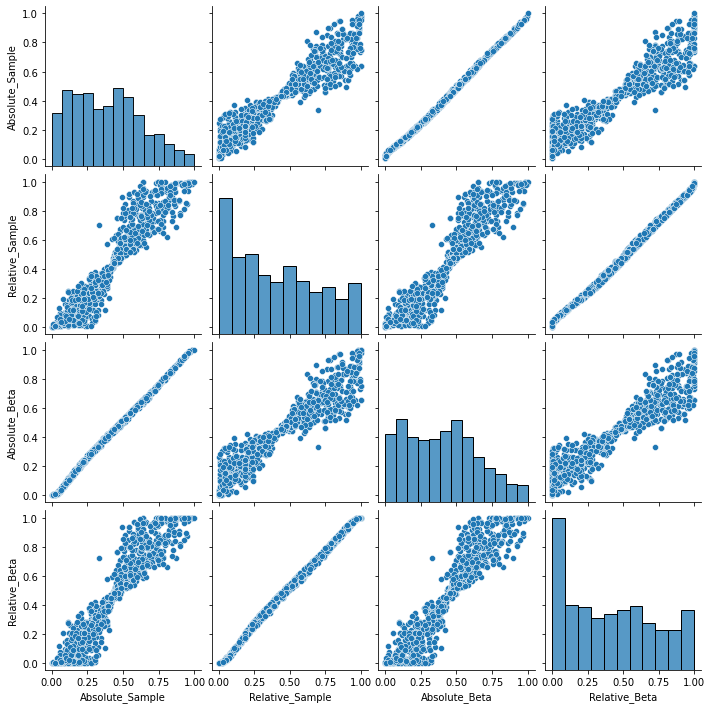

In [39]:
sns.pairplot(data=dynamic_result)